#Predicting ICU Mortality and Identifying Key Clinical Risk Factors Using Machine Learning
#Background:
In intensive care units (ICUs), timely and accurate identification of patients at high risk of mortality is crucial for guiding treatment decisions and optimizing care. While ICU clinicians rely on their experience and standard clinical scoring systems (like APACHE) to predict outcomes, there is potential for machine learning (ML) to enhance predictive accuracy by analyzing patterns in large datasets with multiple clinical variables.

#Objective:
The goal of this project is to develop a machine learning model that predicts ICU mortality based on clinical parameters recorded during a patient’s stay. Additionally, the project aims to uncover the key clinical features most strongly associated with patient outcomes, which can provide valuable insights into ICU patient management.

In [1]:
######Importing  some Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
######importing Data and overviewing the Data
health_data= pd.read_csv("/content/dataset.csv")
pd.set_option('display.max_columns', None)
health_data.head(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
5,33181,74489,83,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0

In [3]:
health_data.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [4]:
health_data.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.

In [5]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
#### Data Cleanining
new_data = health_data.drop("Unnamed: 83", axis=1)


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [8]:
###### Checking the percentage of missing Data
pd.set_option("display.max_rows", None)
missing_data_percentage = new_data.isna().mean() * 100
missing_data_percentage

,0
encounter_id,0.000000
patient_id,0.000000
hospital_id,0.000000
age,4.610033
bmi,3.738837
elective_surgery,0.000000
ethnicity,1.521049
gender,0.027259
height,1.454538
icu_admit_source,0.122120


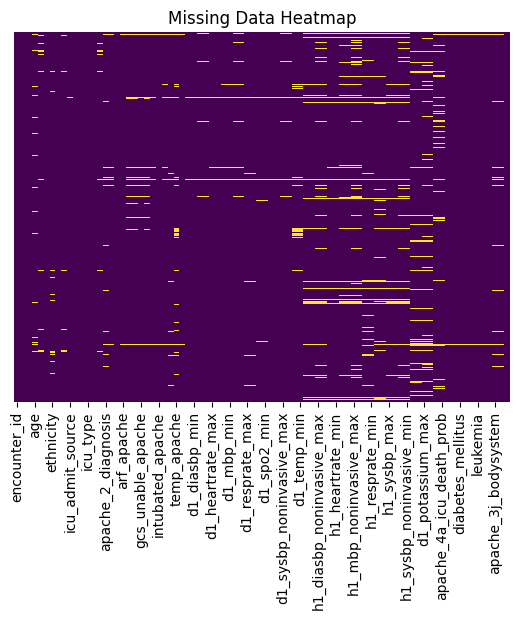

In [9]:
sns.heatmap(new_data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
clean_data= new_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56935 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   56935 non-null  int64  
 1   patient_id                     56935 non-null  int64  
 2   hospital_id                    56935 non-null  int64  
 3   age                            56935 non-null  float64
 4   bmi                            56935 non-null  float64
 5   elective_surgery               56935 non-null  int64  
 6   ethnicity                      56935 non-null  object 
 7   gender                         56935 non-null  object 
 8   height                         56935 non-null  float64
 9   icu_admit_source               56935 non-null  object 
 10  icu_id                         56935 non-null  int64  
 11  icu_stay_type                  56935 non-null  object 
 12  icu_type                       56935 non-null  obje

In [11]:
#####calculationg percentage of data lost during cleaning
data_diferrence= new_data["patient_id"].count()-clean_data["patient_id"].count()
percentage_loss= data_diferrence/new_data["patient_id"].count()*100
print(f"Percentage of Data lost after cleaning is {percentage_loss}%")

Percentage of Data lost after cleaning is 37.920469290067935%


In [12]:
###### Need to export the clean data and upload to SQL database
clean_data.to_csv("C:\\Users\\iyand\\Downloads\\CleanICUdata.csv", index= False )

<Axes: xlabel='hospital_death', ylabel='count'>

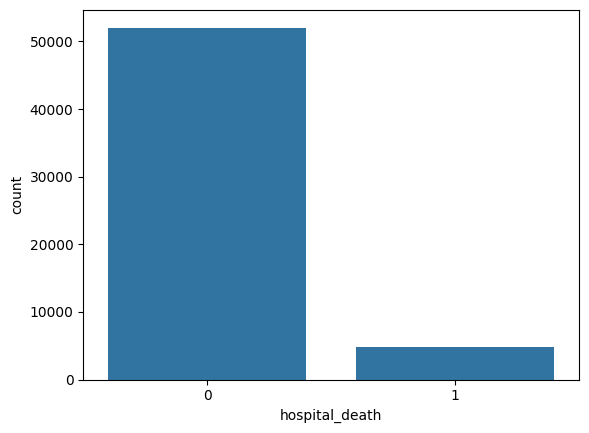

In [13]:
#### pulling the data back from SQL and Doing exploratory Data Analysis
sns.countplot(x="hospital_death", data=clean_data)

<Axes: xlabel='hospital_death', ylabel='count'>

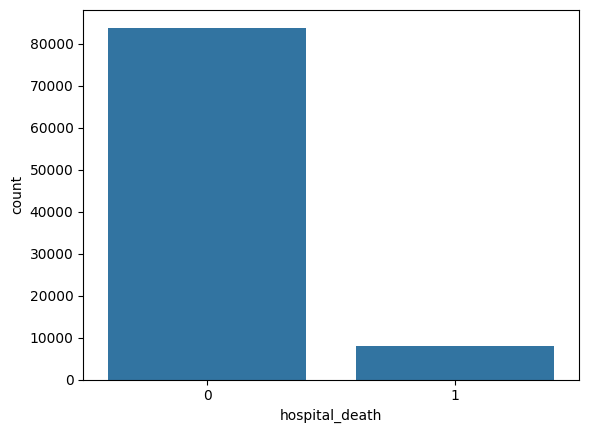

In [14]:
sns.countplot(x="hospital_death", data=health_data)

Before and after data cleaning, there is an imbalance destribution in target variable, i.e the hospital death distribution

In [15]:
####### Let check for distribution of columns with object value and classification
object_columns = clean_data.select_dtypes(include='object').columns
print(object_columns)

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')


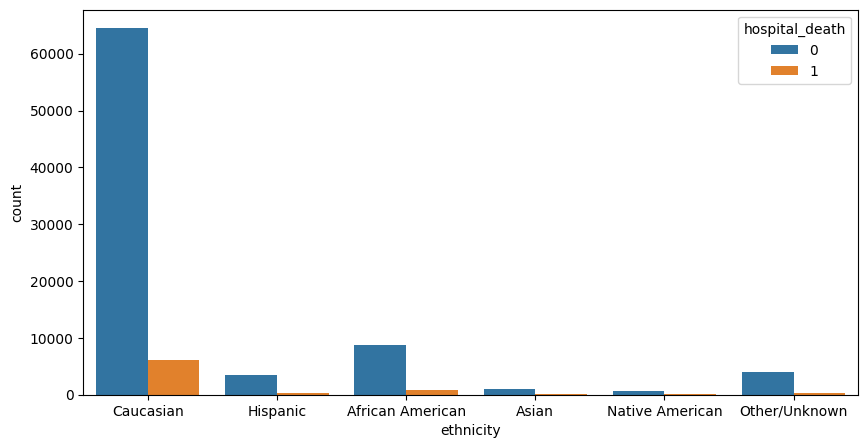

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x="ethnicity", data=health_data , hue="hospital_death")
plt.show()


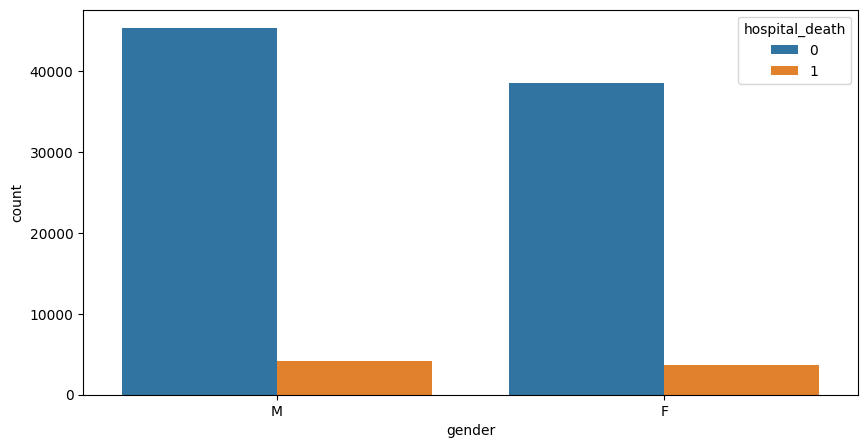

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x="gender", data=health_data , hue="hospital_death")
plt.show()

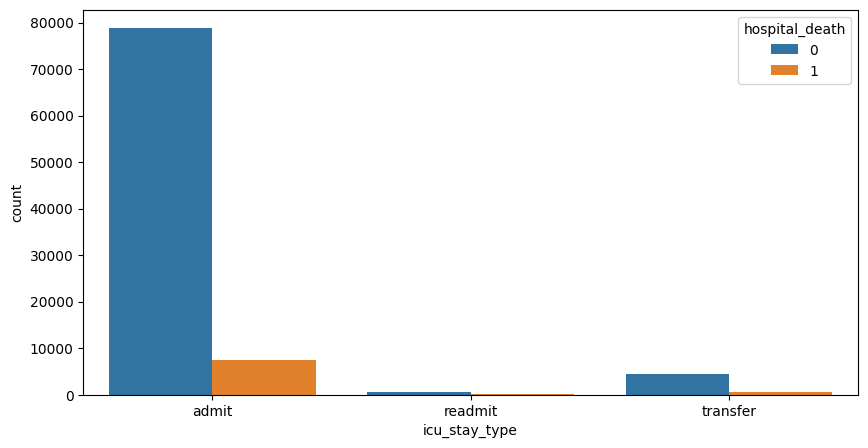

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x="icu_stay_type", data=health_data , hue="hospital_death")
plt.show()

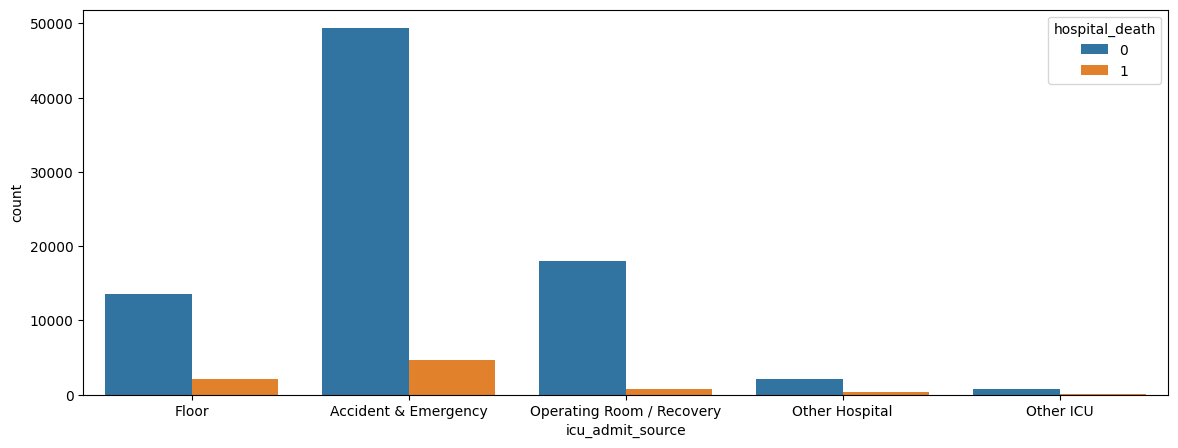

In [19]:
plt.figure(figsize=(14, 5))
sns.countplot(x="icu_admit_source", data=health_data , hue="hospital_death")
plt.show()

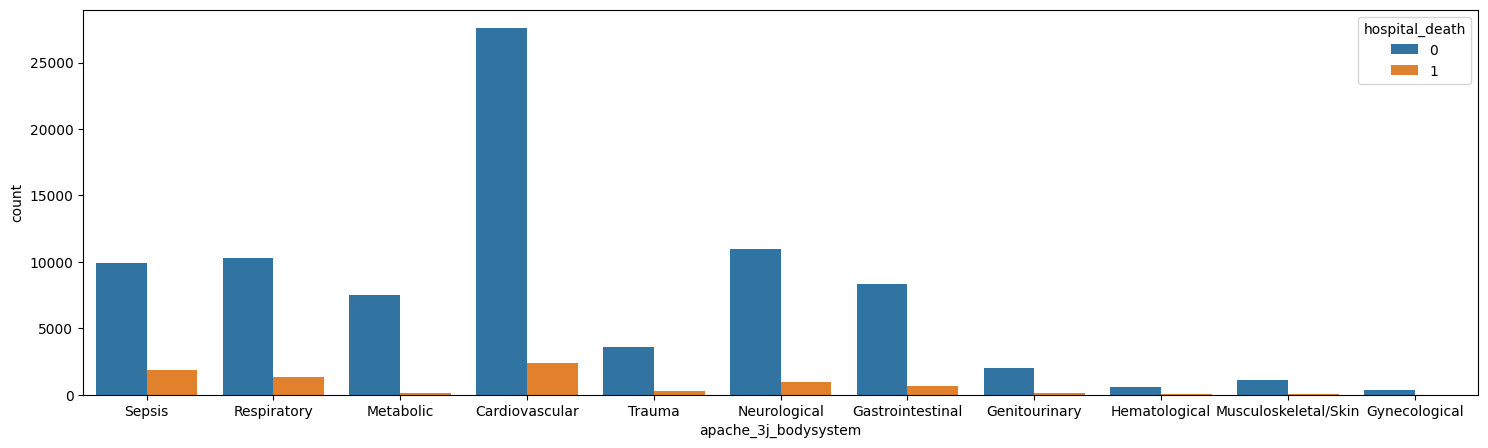

In [20]:
plt.figure(figsize=(18, 5))
sns.countplot(x="apache_3j_bodysystem", data=health_data , hue="hospital_death")
plt.show()

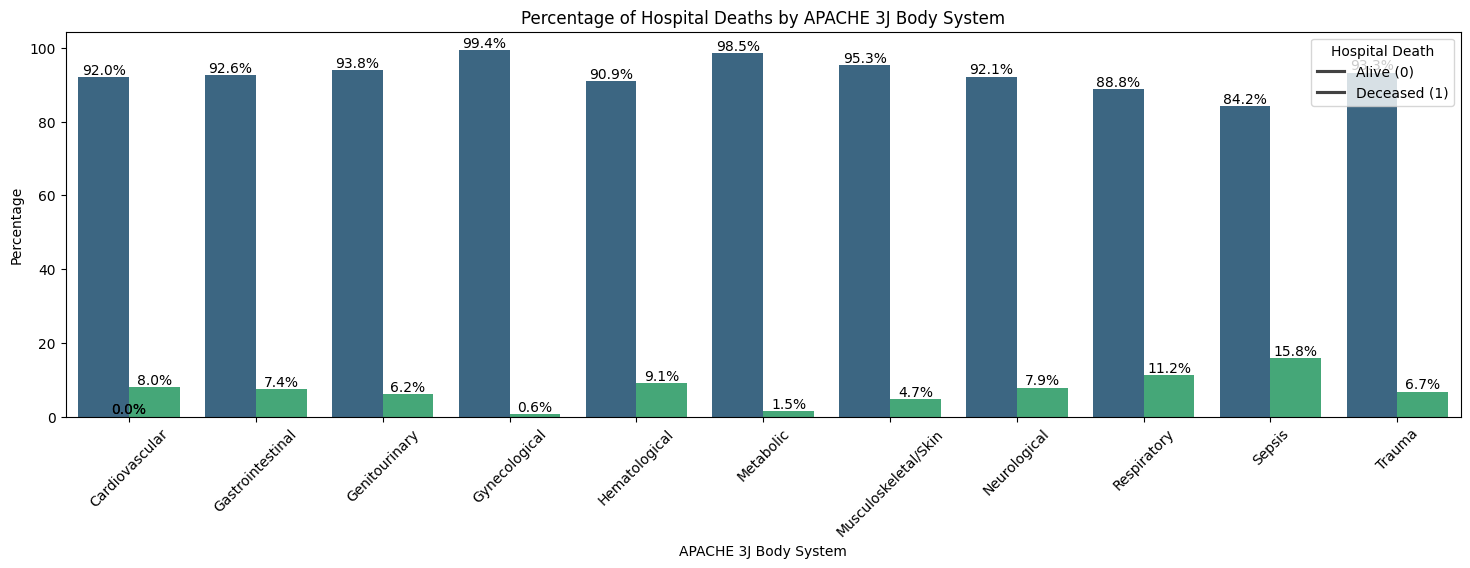

In [21]:
death_counts = health_data.groupby(['apache_3j_bodysystem', 'hospital_death']).size().unstack()
death_percentage = death_counts.div(death_counts.sum(axis=1), axis=0) * 100
death_percentage = death_percentage.reset_index()
death_percentage_melted = death_percentage.melt(id_vars='apache_3j_bodysystem', var_name='hospital_death', value_name='percentage')

plt.figure(figsize=(18, 5))
barplot = sns.barplot(data=death_percentage_melted, x='apache_3j_bodysystem', y='percentage', hue='hospital_death', palette='viridis')

plt.title('Percentage of Hospital Deaths by APACHE 3J Body System')
plt.xlabel('APACHE 3J Body System')
plt.ylabel('Percentage')
plt.legend(title='Hospital Death', labels=['Alive (0)', 'Deceased (1)'])
plt.xticks(rotation=45)

for p in barplot.patches:
    percentage = f"{p.get_height():.1f}%"
    barplot.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

plt.show()

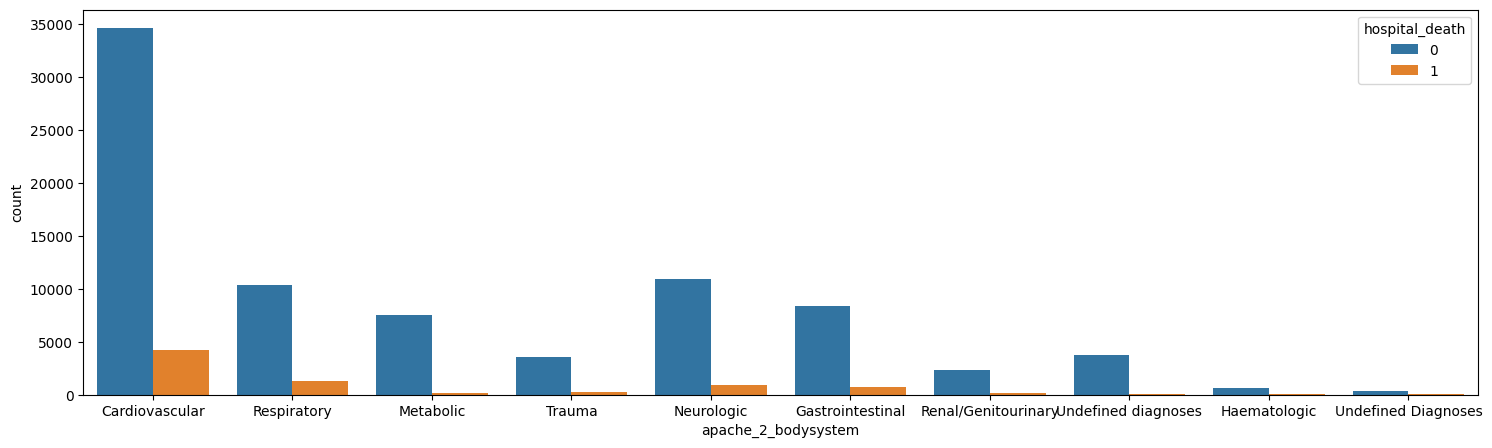

In [22]:
plt.figure(figsize=(18, 5))
sns.countplot(x="apache_2_bodysystem", data=health_data , hue="hospital_death")
plt.show()

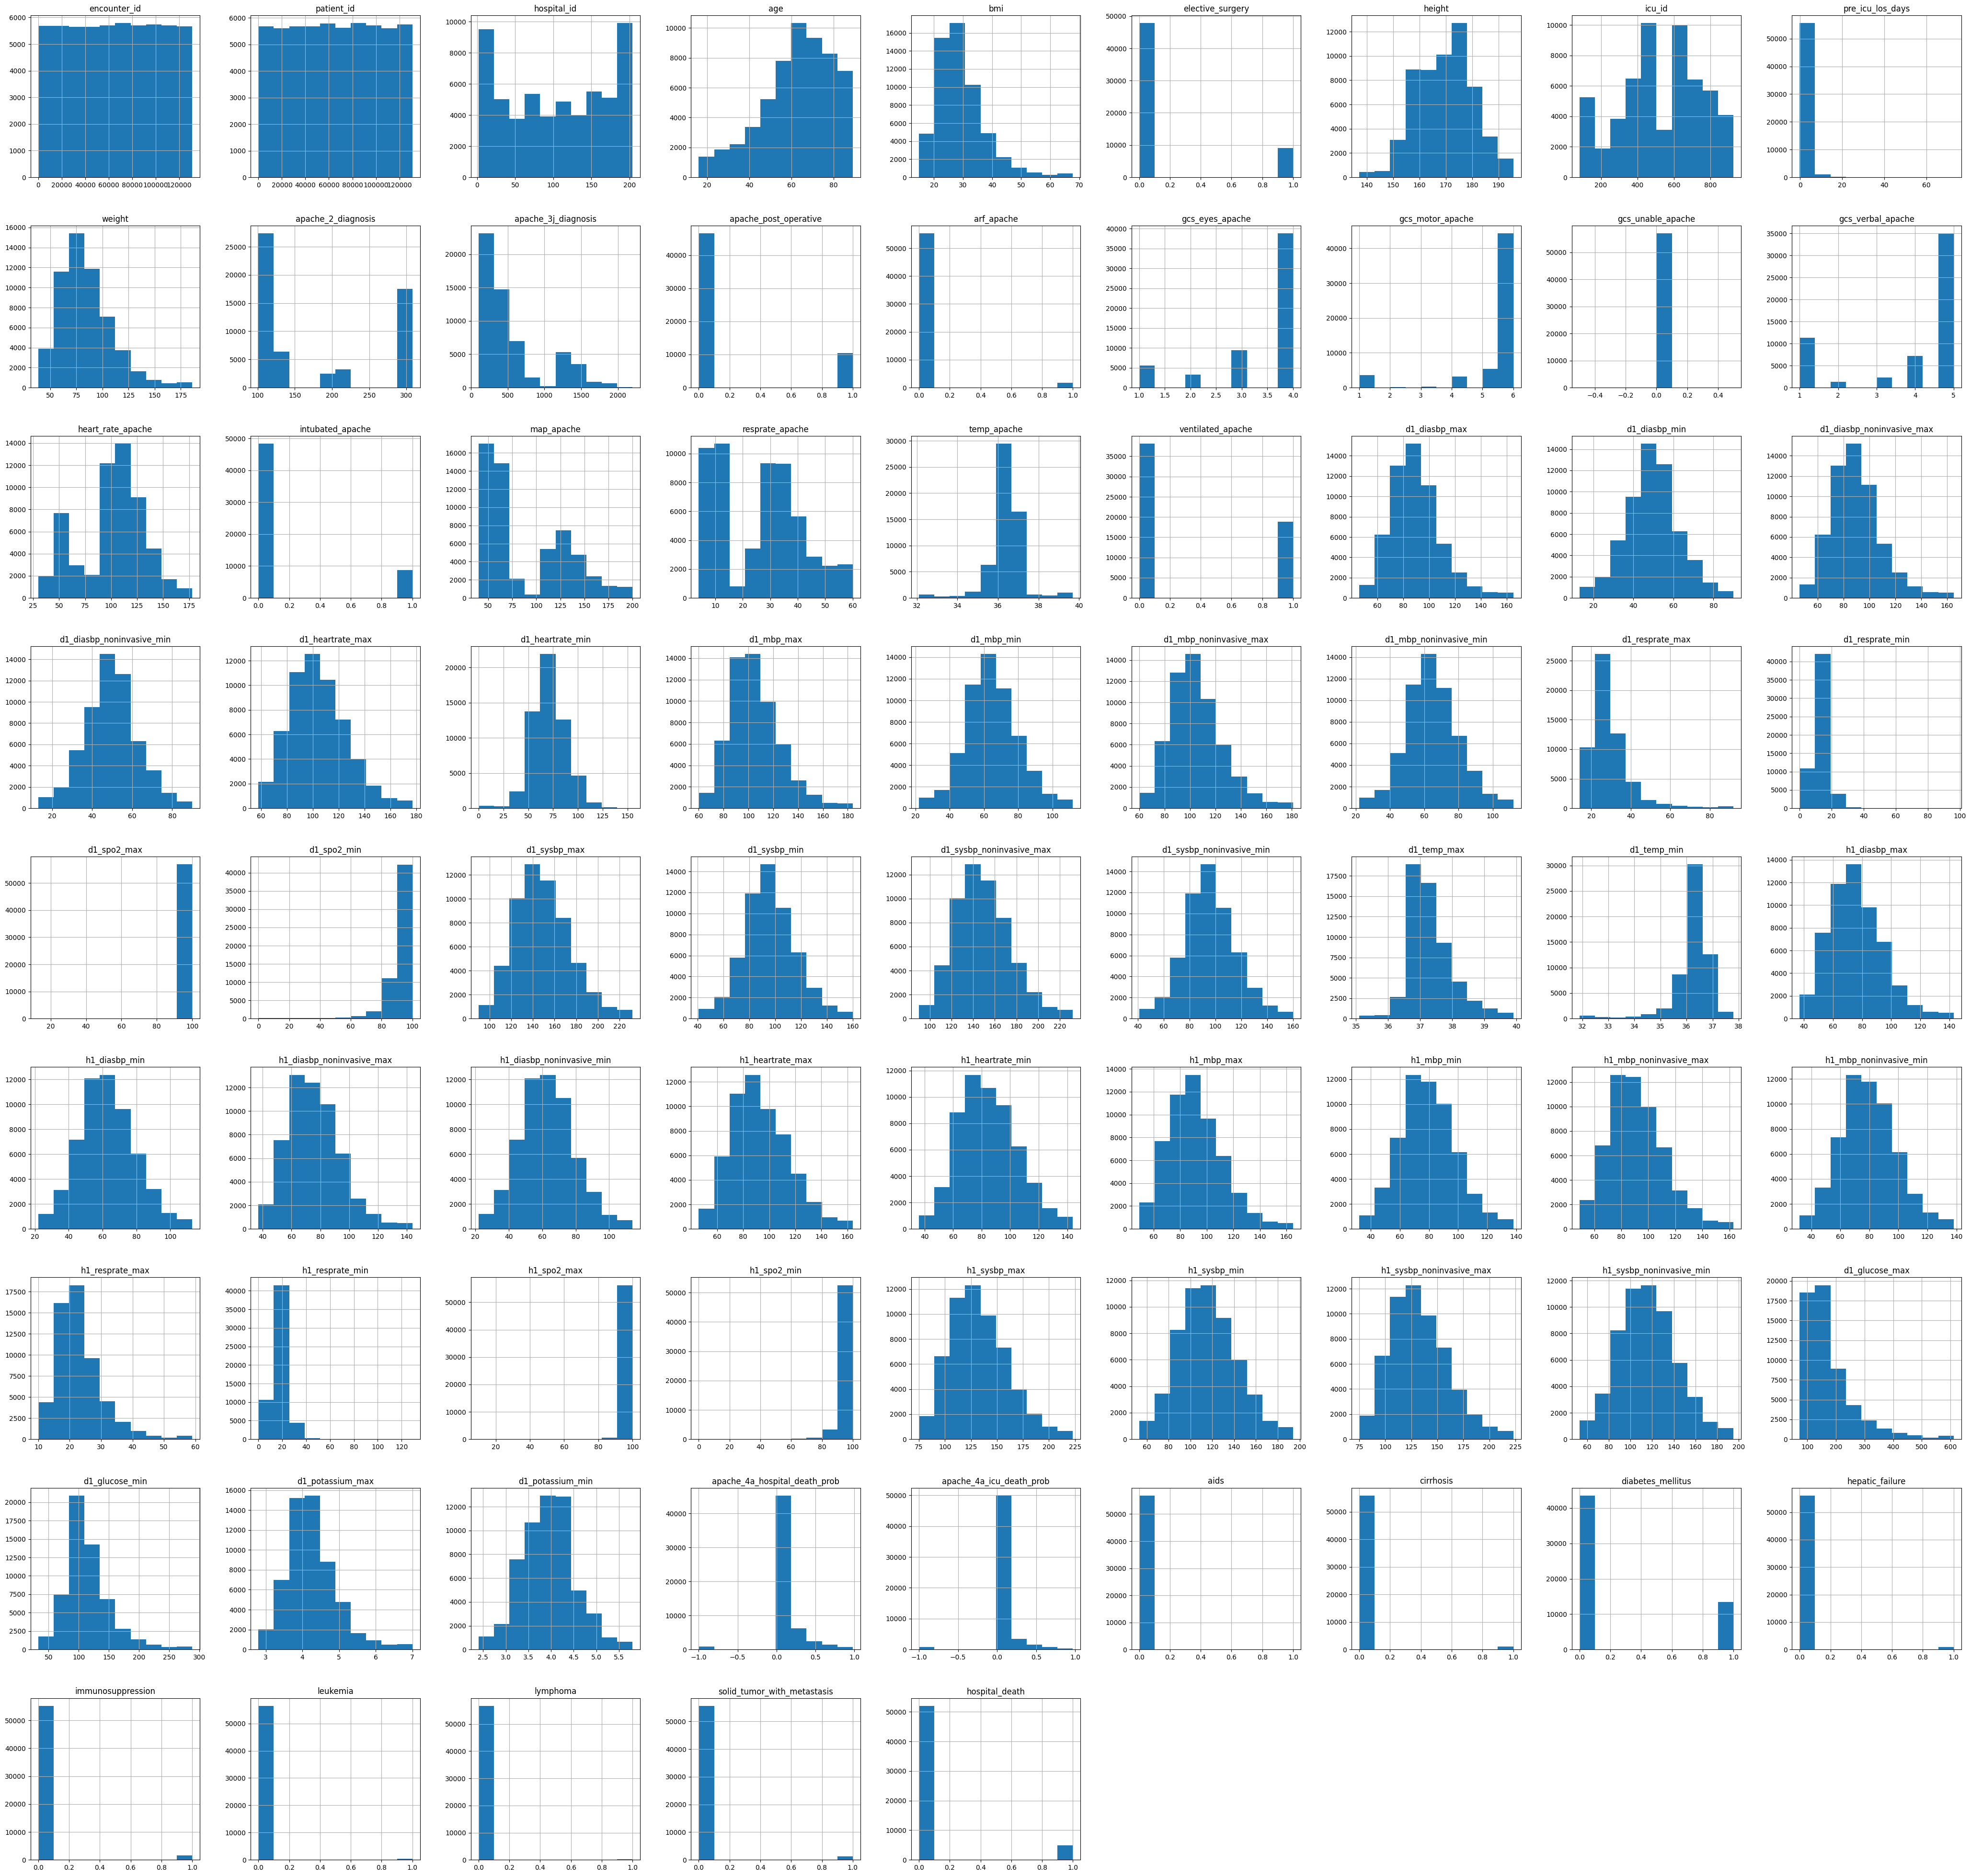

In [23]:
#######
clean_data.hist(figsize=(52,50))
plt.show()

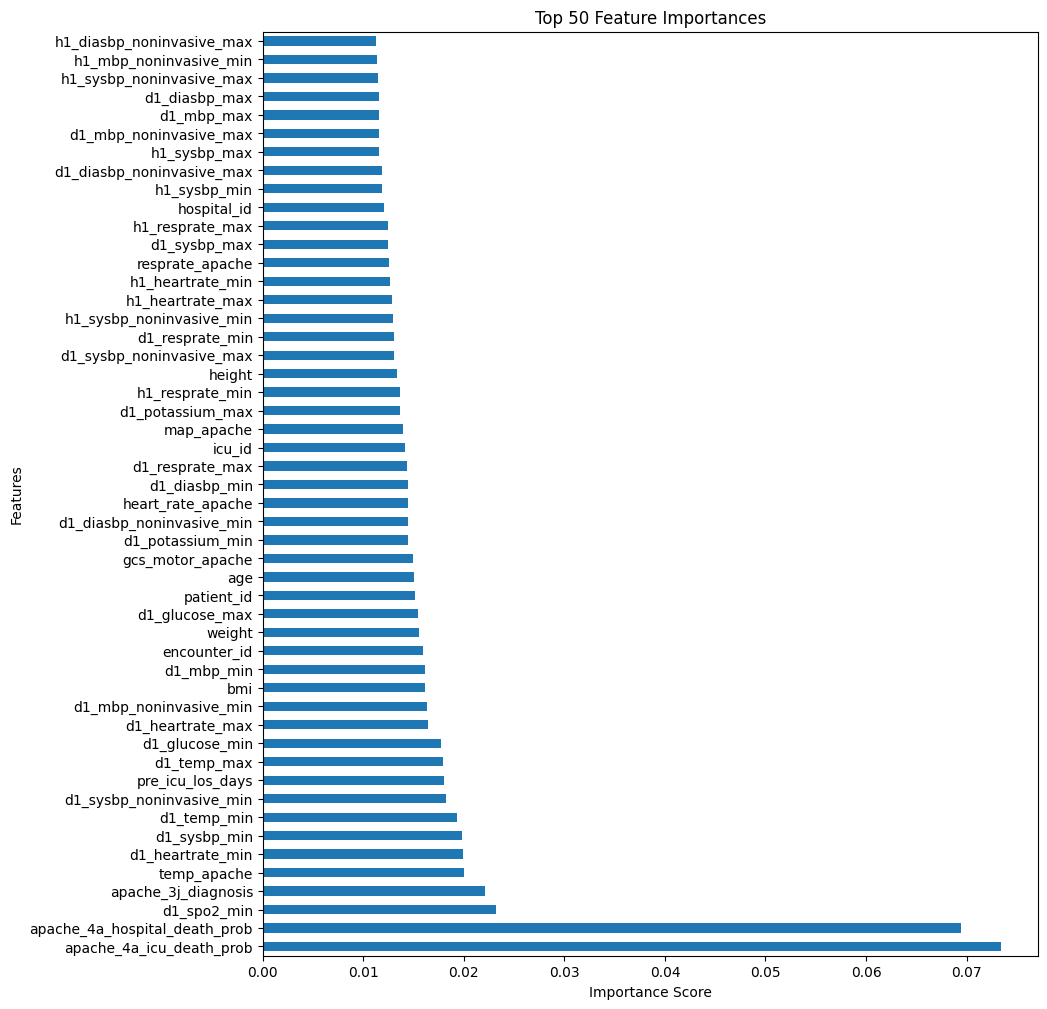

In [24]:
#### Feature importance of each column determination using SKlearn
plt.figure(figsize=(10, 12))
from sklearn.ensemble import RandomForestClassifier
Feature_model = RandomForestClassifier()
X1 = clean_data.drop(columns=["hospital_death", "ethnicity", "gender", "icu_admit_source",
                              "icu_stay_type", "icu_type", "apache_3j_bodysystem",
                              "apache_2_bodysystem"])
y1 = clean_data["hospital_death"]

Feature_model.fit(X1, y1)
Feature_importance = pd.Series(Feature_model.feature_importances_, index=X1.columns)
Feature_importance.nlargest(50).plot(kind='barh')
plt.title("Top 50 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



The Acute Physiology and Chronic Health Evaluation (APACHE) IV model can predict the intensive care unit (ICU) length of stay (LOS) in critically ill patients.   That this happen to be the most important features in the data set

Text(0.5, 1.0, 'KDE distribution of apache_4a_icu_death_prob ')

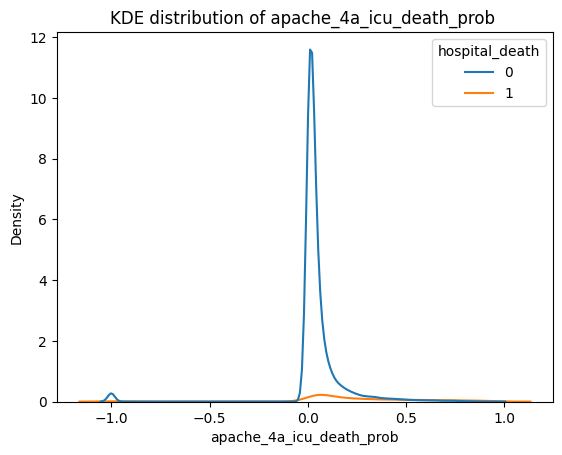

In [25]:
sns.kdeplot(data=clean_data, x='apache_4a_icu_death_prob', hue='hospital_death')
plt.title("KDE distribution of apache_4a_icu_death_prob ")

Text(0.5, 1.0, 'KDE distribution of apache_4a_hospital_death_prob ')

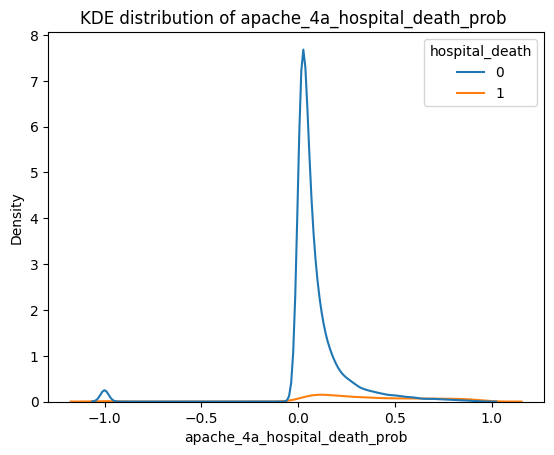

In [26]:
sns.kdeplot(data=clean_data, x='apache_4a_hospital_death_prob', hue='hospital_death')
plt.title("KDE distribution of apache_4a_hospital_death_prob ")

In [27]:
correlation = X1.corr()
correlation

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,-0.001036,-0.005555,-0.004015,0.001026,-0.002694,-0.006739,-0.000704,-0.000998,-0.002298,-0.000374,-0.001103,-0.002450,0.012406,0.005690,0.010362,NaN,0.008068,-0.002901,-0.007877,-0.001580,0.008714,0.006060,-0.013043,-0.002887,-0.000322,-0.002818,-0.000037,-0.006774,0.001381,-0.000186,-0.001552,0.001062,-0.001624,0.007901,0.001453,-0.002737,0.002650,-0.003727,-0.002810,-0.003711,-0.002786,-0.006661,0.004776,-0.003139,0.002802,-0.002042,0.002508,-0.002534,-0.002998,0.000930,0.004229,0.001418,0.004255,0.007569,0.002913,-0.000712,-0.003846,0.003081,0.000381,0.002926,0.000954,0.003829,0.002371,-0.004673,-0.003733,-0.005155,-0.005044,0.001709,0.011650,0.006541,0.001078,-0.002094,-0.003623,-0.001809,-0.003849
patient_id,-0.001036,1.000000,-0.006371,0.005469,0.000692,0.005650,0.004081,-0.002483,-0.005094,0.002387,-0.001801,0.004916,0.005205,-0.000592,0.002008,0.001737,NaN,0.002699,0.004945,0.003930,-0.003315,0.002281,-0.000320,-0.001335,-0.002492,-0.001735,-0.002276,-0.001946,-0.000357,0.000861,-0.004624,-0.002503,-0.004520,-0.002932,0.003176,0.003608,-0.003005,-0.005226,-0.001849,-0.007961,-0.001642,-0.008424,-0.003322,-0.001115,-0.004722,-0.008662,-0.003283,-0.009840,0.001650,0.002568,-0.003626,-0.007897,-0.002664,-0.008033,0.003544,-0.000946,0.000079,-0.003214,-0.003712,-0.009131,-0.003964,-0.010023,-0.007430,0.000074,0.002094,0.003155,0.003026,0.004431,-0.000660,0.004198,-0.001333,-0.002630,0.001413,0.000975,-0.002327,-0.006374
hospital_id,-0.005555,-0.006371,1.000000,-0.009069,0.009028,0.041702,0.033112,0.035638,-0.001453,0.025224,-0.002859,0.020115,0.041987,0.000071,-0.007684,-0.017686,NaN,0.003370,-0.006215,0.019899,-0.002743,-0.020449,-0.032016,0.025514,-0.019117,0.013821,-0.018961,0.013578,-0.006119,-0.008510,-0.019417,0.008801,-0.018866,0.009003,-0.032569,-0.019908,-0.009052,-0.001524,-0.028943,0.005046,-0.028474,0.004905,0.016621,-0.044566,0.001180,-0.014265,0.002316,-0.012543,-0.010177,-0.022248,0.000636,-0.011939,-0.000345,-0.011090,-0.023934,-0.036231,0.017704,0.001696,-0.007294,-0.020903,-0.009218,-0.021643,-0.001785,0.022893,0.002906,-0.012871,-0.003032,0.004436,-0.006257,0.006344,0.011368,0.003995,0.000381,-0.005046,0.006326,-0.005487
age,-0.004015,0.005469,-0.009069,1.000000,-0.080486,0.057514,-0.119639,-0.022573,0.054951,-0.125288,0.026553,-0.063351,0.046583,-0.002780,0.043832,0.044063,NaN,-0.002946,-0.155835,-0.003185,-0.017040,0.034650,-0.081164,0.023629,-0.056655,-0.208602,-0.056564,-0.207904,-0.145065,-0.147906,0.006689,-0.129142,0.006209,-0.129187,0.027702,0.048954,-0.043002,-0.081491,0.105590,-0.060245,0.105191,-0.060213,-0.100176,-0.066129,-0.138641,-0.186812,-0.136606,-0.187165,-0.172870,-0.172761,-0.059667,-0.100795,-0.060153,-0.100612,0.026192,0.035833,-0.067605,-0.079734,0.043745,-0.001140

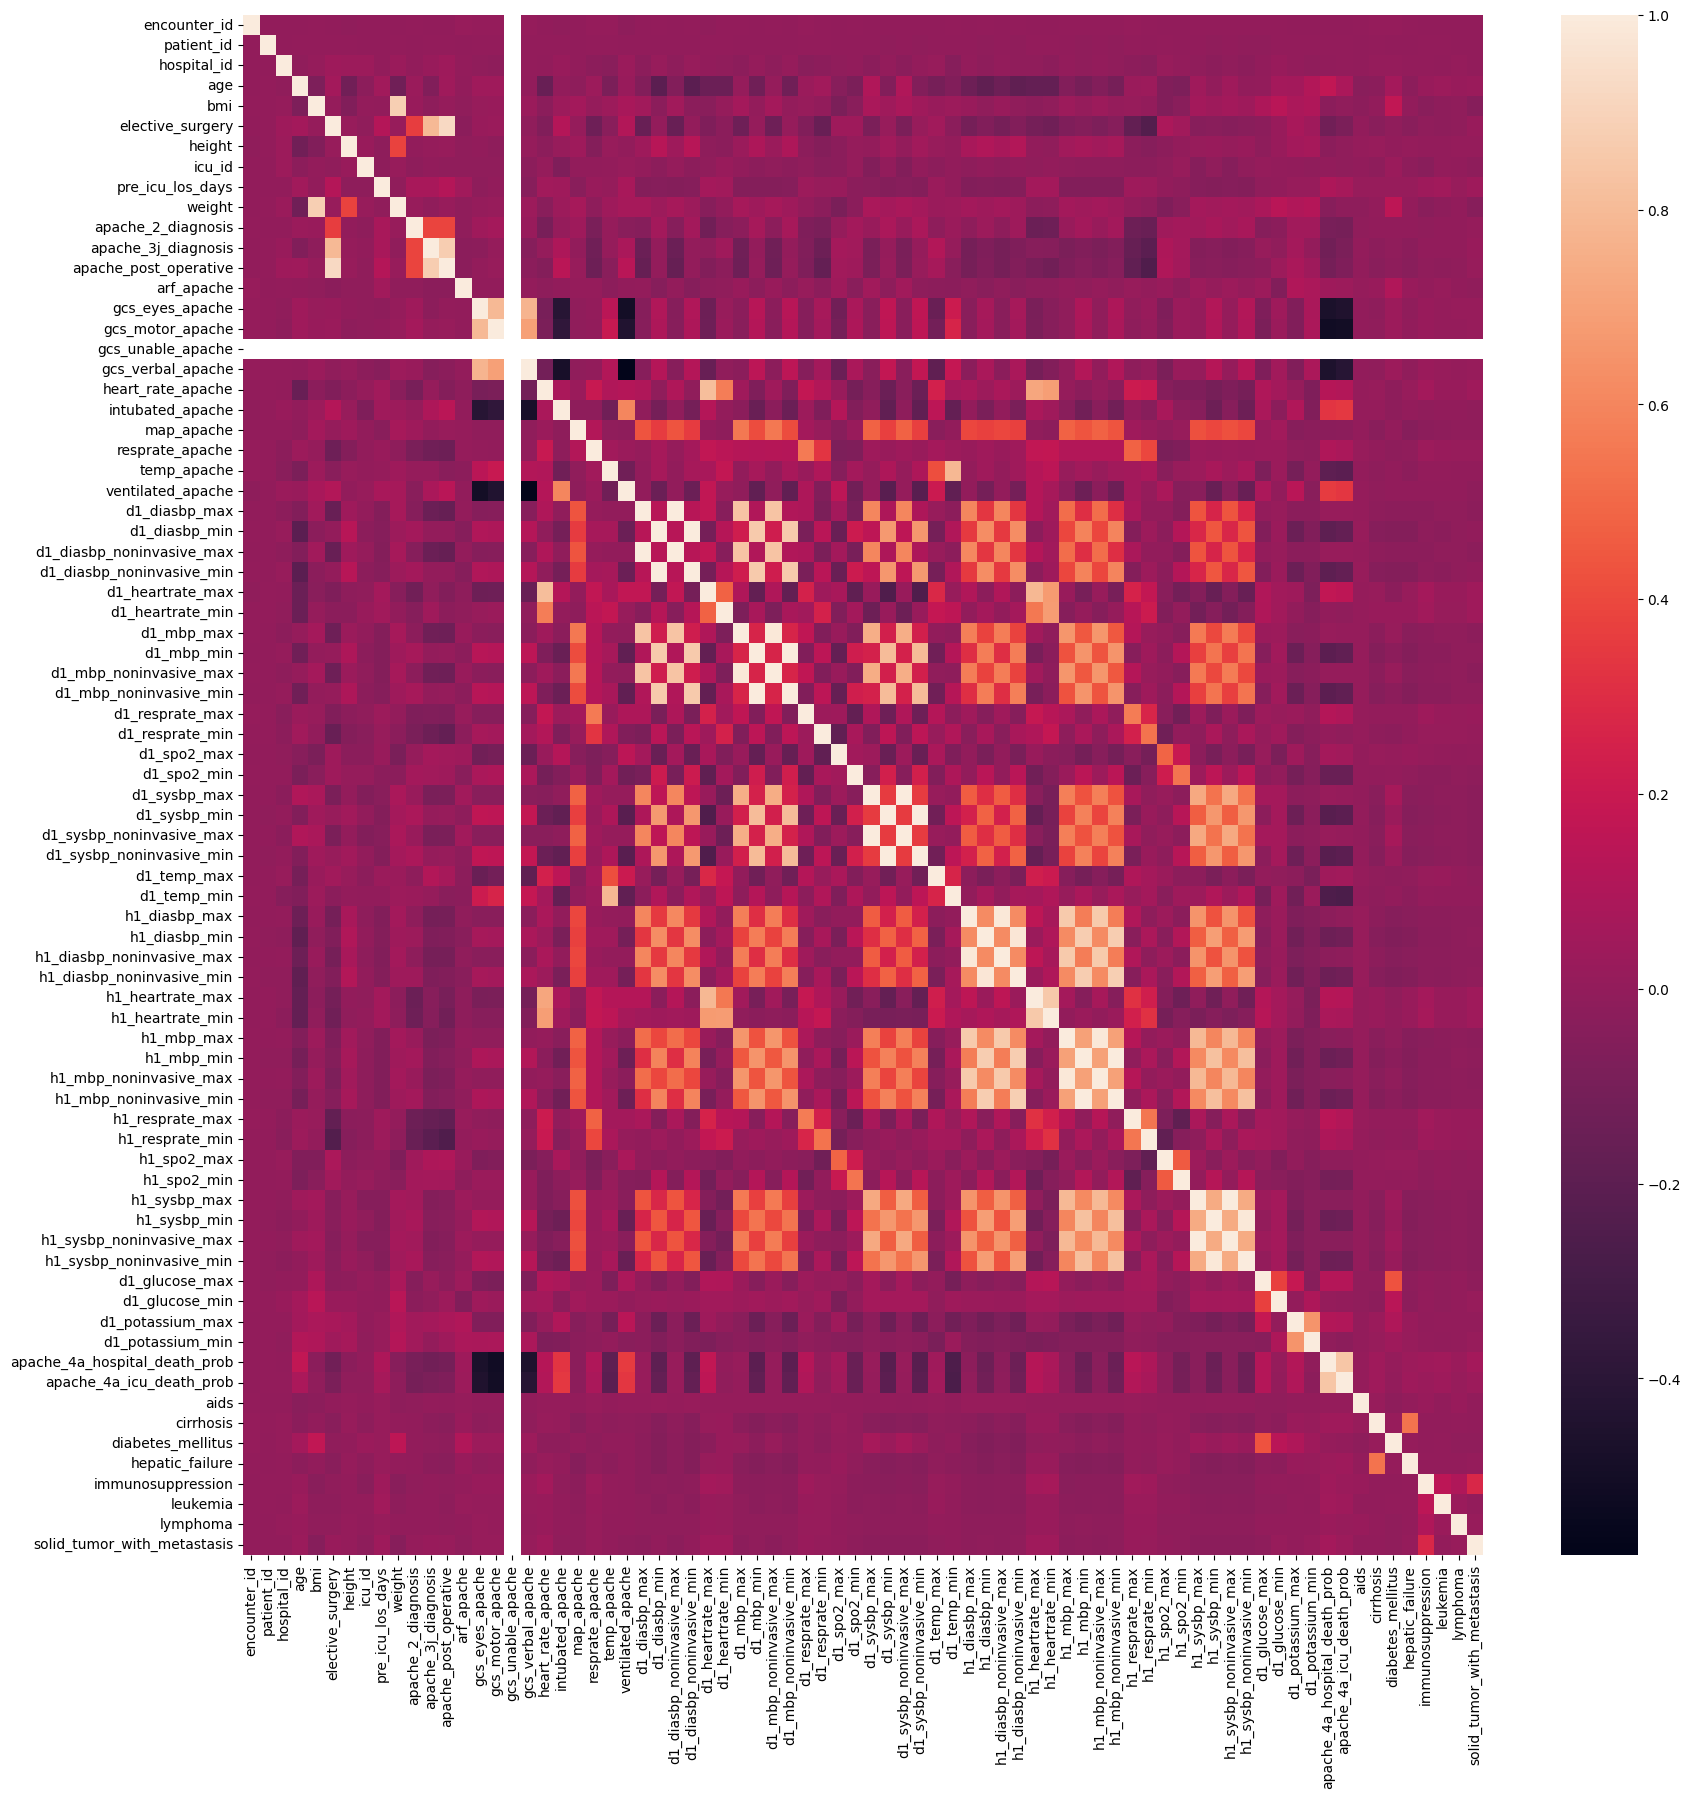

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation)
plt.show()

#Data Processing For ML training

In [29]:
clean_data.head(15)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
5,33181,74489,83,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
10,105427,125898,77,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,0.004861,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,91.0,87.0,91.0,87.0,23.0,14.0,99.0,93.0,145.0,114.0,145.0,114.0,158.0,133.0,4.2,4.2,0.01,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
17,22471,112115,118,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,92,admit,CTICU,0.000000,72.6,108.0,203.01,0,0.0,1.0,4.0,0.0,1.0,114.0,1.0,113.0,34.0,36.4,1.0,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,143.0,143.0,4.9,4.9,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
18,48056,114220,118,65.0,28.408929,0,Hispanic,M,167.6,Accident & Emergency,100,admit,Neuro ICU,0.000000,79.8,301.0,410.01,0,0.0,4.0,6.0,0.0,4.0,98.0,0.0,55.0,4.0,36.6,0.0,73.0,43.0,73.0,43.0,102.0,66.0,103.0,55.0,103.0,55.0,22.0,8.0,100.0,92.0,129.0,84.0,129.0,84.0,36.8,36.6,66.0,53.0,66.0,53.0,100.0,74.0,84.0,78.0,84.0,78.0,21.0,12.0,99.0,95.0,121.0,93.0,121.0,93.0,114.0,88.0,4.0,4.0,0.0

In [30]:
#### one hot encoding for the categorical data in string
###['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type','apache_3j_bodysystem', 'apache_2_bodysystem']
clean_data1=clean_data.copy()
one_hot_encode_data= pd.get_dummies(clean_data1, columns= ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type','apache_3j_bodysystem', 'apache_2_bodysystem'], drop_first=False )
one_hot_encode_data.head(15)


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,68.0,22.730000,0,180.3,92,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,114252,59342,81,77.0,27.420000,0,160.0,90,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
5,33181,74489,83,67.0,27.560000,0,190.5,95,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89

In [31]:
encoded_data=one_hot_encode_data.astype(int)
encoded_data.head(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,68,22,0,180,92,0,73,113,502,0,0,3,6,0,4,118,0,40,36,39,0,68,37,68,37,119,72,89,46,89,46,34,10,100,74,131,73,131,73,39,37,68,63,68,63,119,108,86,85,86,85,26,18,100,74,131,115,131,115,168,109,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,114252,59342,81,77,27,0,160,90,0,70,108,203,0,0,1,3,0,1,120,0,46,33,35,1,95,31,95,31,118,72,120,38,120,38,32,12,100,70,159,67,159,67,36,35,61,48,61,48,114,100,85,57,85,57,31,28,95,70,95,71,95,71,145,128,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,33181,74489,83,67,27,0,190,95,0,100,301,403,0,0,4,6,0,5,113,0,130,35,36,0,100,61,100,61,113,83,127,80,127,80,32,10,97,91,173,107,173,107,36,36,89,89,89,89,83,83,111,111,111,111,12,12,97,97,143,143,143,143,156,125,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
10,105427,125898,77,72,28,1,154,113,0,67,303,1304,1,0,4,6,0,5,101,0,72,15,36,0,72,53,72,53,101,67,93,70,93,70,23,14,99,92,145,95,145,95,37,36,72,56,72,56,90,70,91,87,91,87,23,14,99,93,145,114,145,114,158,133,4,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
17,22471,112115,118,46,25,0,167,92,0,72,108,203,0,0,1,4,0,1,114,1,113,34,36,1,89,61,89,61,98,64,113,76,113,76,22,9,100,88,169,102,169,102,37,36,89,63,89,63,94,80,104,88,104,88,21,9,99,95,169,115,169,115,143,143,4,4,0,0,0,0,0,0,0,0,

In [32]:
from scipy import stats
z_score= stats.zscore(encoded_data.select_dtypes(include= ["float", "int64"]))
outlier = (z_score>3) | (z_score< -3)
df_ourliers = encoded_data[outlier.any(axis=1)]
df_ourliers


In [39]:
#######listing features with ouliers
outlier_counts = outlier.sum(axis=0)
sorted_outlier_counts = outlier_counts.sort_values(ascending=False)
print(sorted_outlier_counts)



apache_2_bodysystem_Metabolic                 5123
apache_3j_bodysystem_Metabolic                5123
icu_type_Neuro ICU                            4927
hospital_death                                4891
icu_type_CCU-CTICU                            4574
icu_stay_type_admit                           3898
icu_type_SICU                                 3846
icu_stay_type_transfer                        3662
gcs_motor_apache                              3616
icu_type_Cardiac ICU                          3206
ethnicity_Other/Unknown                       2796
icu_type_CSICU                                2549
apache_3j_bodysystem_Trauma                   2419
apache_2_bodysystem_Trauma                    2419
ethnicity_Hispanic                            2390
temp_apache                                   2116
apache_2_bodysystem_Undefined diagnoses       1940
icu_type_CTICU                                1708
icu_admit_source_Other Hospital               1700
arf_apache                     

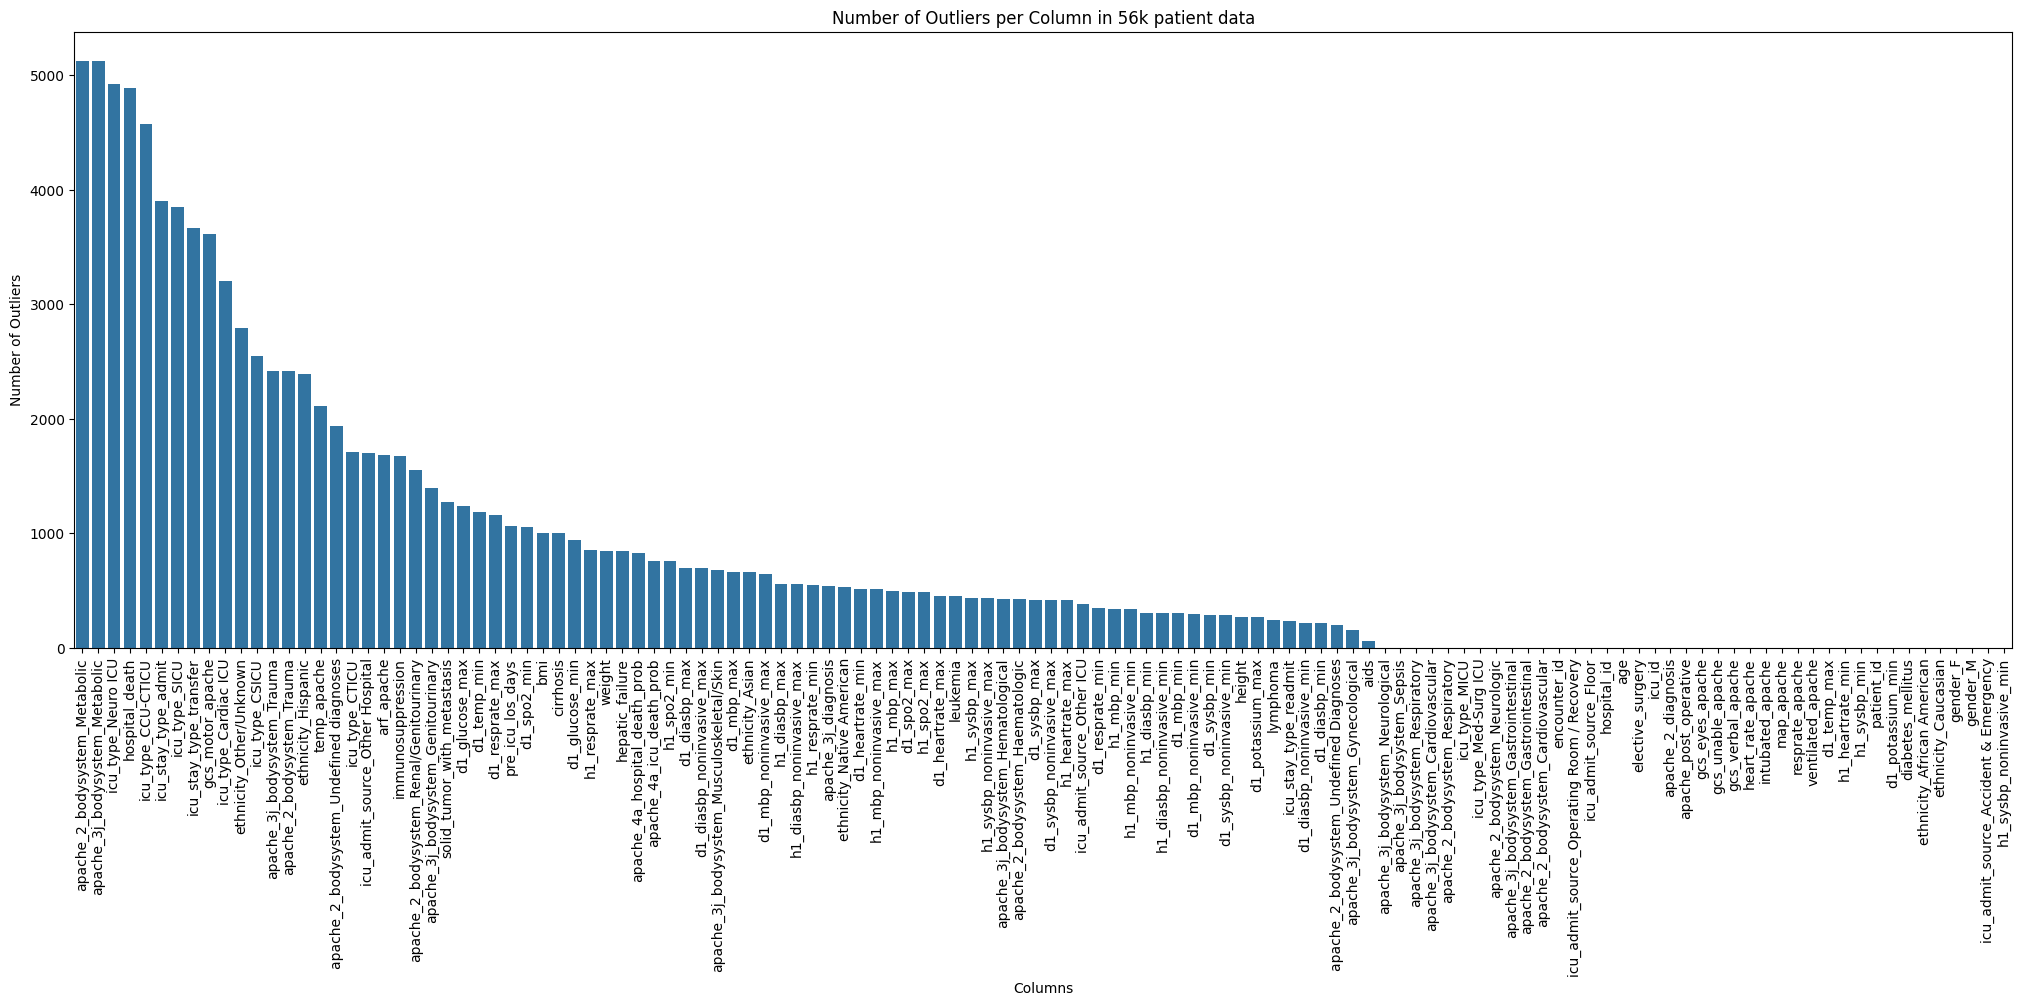

In [48]:
plt.figure(figsize=(25, 8))
sns.barplot(x=sorted_outlier_counts.index, y=sorted_outlier_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Column in 56k patient data')
plt.show()

In the context of this medical dataset, I have chosen not to remove the outliers due to their potential clinical significance. Medical data is inherently variable, reflecting the complex and diverse conditions of individual patients. Outliers in this dataset may represent critically ill patients or rare, yet important, clinical conditions. Removing these values could lead to a loss of meaningful information, particularly in a healthcare setting where extreme values can indicate vital health states or key medical emergencies that are essential for accurate diagnosis and treatment.

In [61]:
print(sorted_outlier_counts.head(82).index)

Index(['apache_2_bodysystem_Metabolic', 'apache_3j_bodysystem_Metabolic',
       'icu_type_Neuro ICU', 'hospital_death', 'icu_type_CCU-CTICU',
       'icu_stay_type_admit', 'icu_type_SICU', 'icu_stay_type_transfer',
       'gcs_motor_apache', 'icu_type_Cardiac ICU', 'ethnicity_Other/Unknown',
       'icu_type_CSICU', 'apache_3j_bodysystem_Trauma',
       'apache_2_bodysystem_Trauma', 'ethnicity_Hispanic', 'temp_apache',
       'apache_2_bodysystem_Undefined diagnoses', 'icu_type_CTICU',
       'icu_admit_source_Other Hospital', 'arf_apache', 'immunosuppression',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_3j_bodysystem_Genitourinary', 'solid_tumor_with_metastasis',
       'd1_glucose_max', 'd1_temp_min', 'd1_resprate_max', 'pre_icu_los_days',
       'd1_spo2_min', 'bmi', 'cirrhosis', 'd1_glucose_min', 'h1_resprate_max',
       'weight', 'hepatic_failure', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'h1_spo2_min', 'd1_diasbp_max',
       'd1_

In [63]:
outlier_columns = encoded_data[['apache_2_bodysystem_Metabolic', 'apache_3j_bodysystem_Metabolic',
                                 'icu_type_Neuro ICU', 'hospital_death', 'icu_type_CCU-CTICU',
                                 'icu_stay_type_admit', 'icu_type_SICU', 'icu_stay_type_transfer',
                                 'gcs_motor_apache', 'icu_type_Cardiac ICU', 'ethnicity_Other/Unknown',
                                 'icu_type_CSICU', 'apache_3j_bodysystem_Trauma',
                                 'apache_2_bodysystem_Trauma', 'ethnicity_Hispanic', 'temp_apache',
                                 'apache_2_bodysystem_Undefined diagnoses', 'icu_type_CTICU',
                                 'icu_admit_source_Other Hospital', 'arf_apache', 'immunosuppression',
                                 'apache_2_bodysystem_Renal/Genitourinary',
                                 'apache_3j_bodysystem_Genitourinary', 'solid_tumor_with_metastasis',
                                 'd1_glucose_max', 'd1_temp_min', 'd1_resprate_max', 'pre_icu_los_days',
                                 'd1_spo2_min', 'bmi', 'cirrhosis', 'd1_glucose_min', 'h1_resprate_max',
                                 'weight', 'hepatic_failure', 'apache_4a_hospital_death_prob',
                                 'apache_4a_icu_death_prob', 'h1_spo2_min', 'd1_diasbp_max',
                                 'd1_diasbp_noninvasive_max', 'apache_3j_bodysystem_Musculoskeletal/Skin',
                                 'd1_mbp_max', 'ethnicity_Asian', 'd1_mbp_noninvasive_max', 'h1_diasbp_max',
                                 'h1_diasbp_noninvasive_max', 'h1_resprate_min', 'apache_3j_diagnosis',
                                 'ethnicity_Native American', 'd1_heartrate_min', 'h1_mbp_noninvasive_max',
                                 'h1_mbp_max', 'd1_spo2_max', 'h1_spo2_max', 'd1_heartrate_max', 'leukemia',
                                 'h1_sysbp_max', 'h1_sysbp_noninvasive_max', 'apache_3j_bodysystem_Hematological',
                                 'apache_2_bodysystem_Haematologic', 'd1_sysbp_max',
                                 'd1_sysbp_noninvasive_max', 'h1_heartrate_max',
                                 'icu_admit_source_Other ICU', 'd1_resprate_min', 'h1_mbp_min',
                                 'h1_mbp_noninvasive_min', 'h1_diasbp_min', 'h1_diasbp_noninvasive_min',
                                 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_sysbp_min',
                                 'd1_sysbp_noninvasive_min', 'height', 'd1_potassium_max', 'lymphoma',
                                 'icu_stay_type_readmit', 'd1_diasbp_noninvasive_min', 'd1_diasbp_min',
                                 'apache_2_bodysystem_Undefined Diagnoses',
                                 'apache_3j_bodysystem_Gynecological', 'aids']]


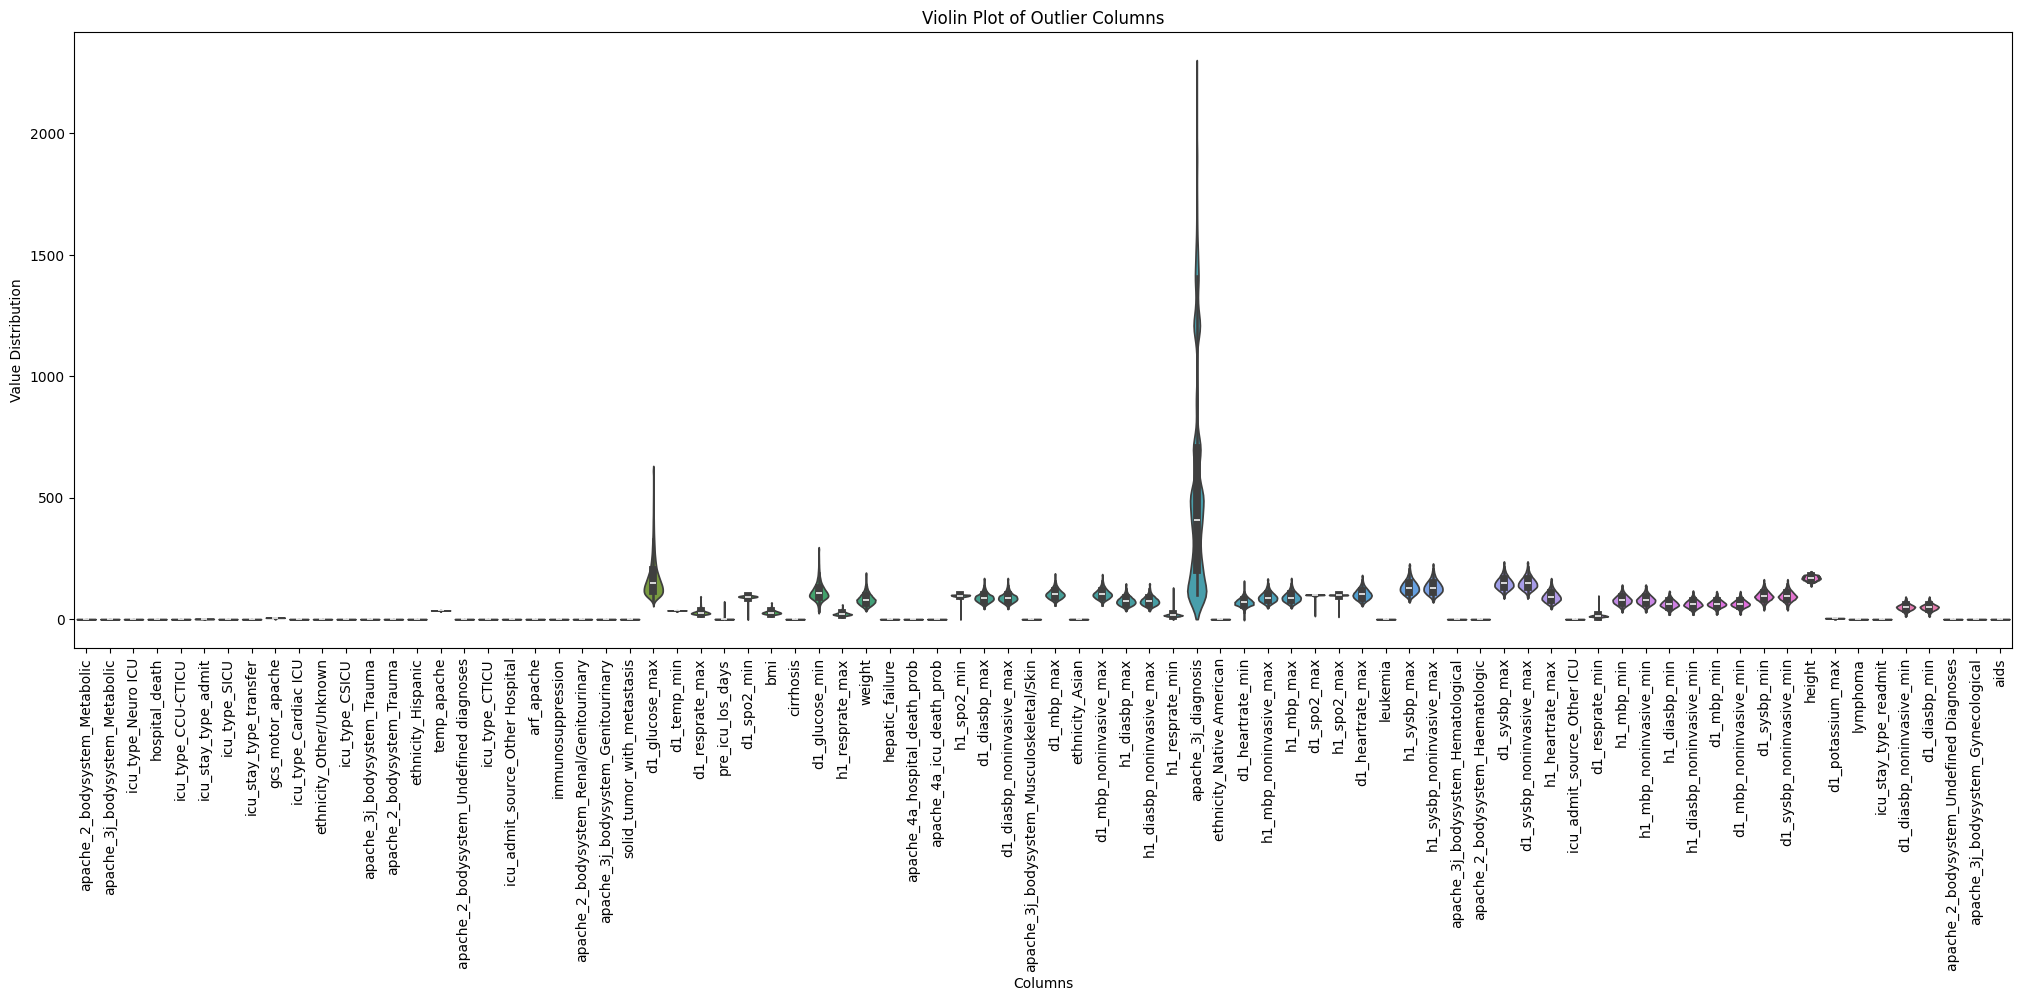

In [65]:
plt.figure(figsize=(25, 8))
sns.violinplot(data=outlier_columns, orient="v")
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Value Distribution')
plt.title('Violin Plot of Outlier Columns')
plt.show()


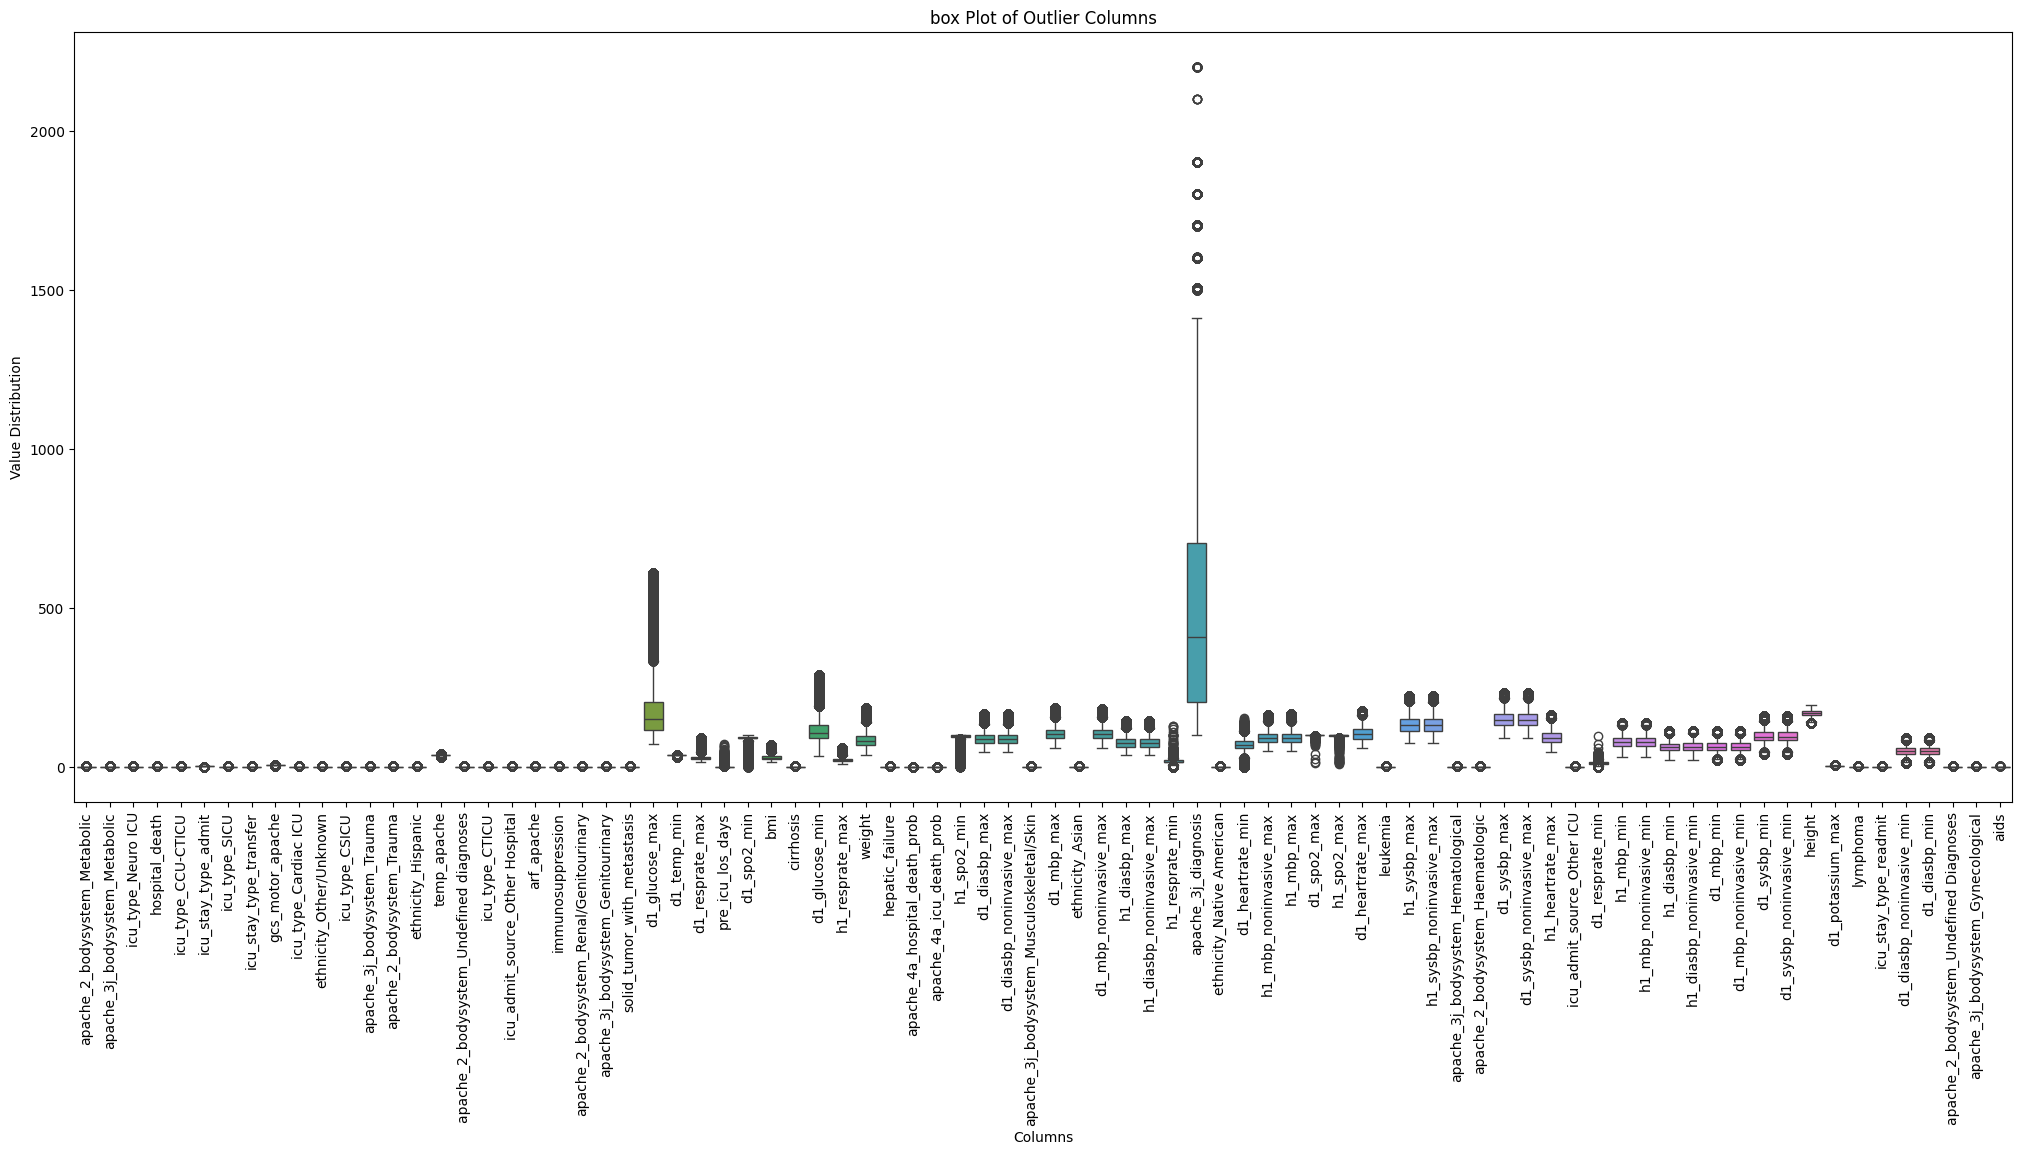

In [68]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=outlier_columns, orient="v")
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Value Distribution')
plt.title('box Plot of Outlier Columns')
plt.show()

In [71]:
#####Train-Test Split for ML  process
encoded_data.head(5)


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,66154,25312,118,68,22,0,180,92,0,73,113,502,0,0,3,6,0,4,118,0,40,36,39,0,68,37,68,37,119,72,89,46,89,46,34,10,100,74,131,73,131,73,39,37,68,63,68,63,119,108,86,85,86,85,26,18,100,74,131,115,131,115,168,109,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,114252,59342,81,77,27,0,160,90,0,70,108,203,0,0,1,3,0,1,120,0,46,33,35,1,95,31,95,31,118,72,120,38,120,38,32,12,100,70,159,67,159,67,36,35,61,48,61,48,114,100,85,57,85,57,31,28,95,70,95,71,95,71,145,128,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,33181,74489,83,67,27,0,190,95,0,100,301,403,0,0,4,6,0,5,113,0,130,35,36,0,100,61,100,61,113,83,127,80,127,80,32,10,97,91,173,107,173,107,36,36,89,89,89,89,83,83,111,111,111,111,12,12,97,97,143,143,143,143,156,125,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
10,105427,125898,77,72,28,1,154,113,0,67,303,1304,1,0,4,6,0,5,101,0,72,15,36,0,72,53,72,53,101,67,93,70,93,70,23,14,99,92,145,95,145,95,37,36,72,56,72,56,90,70,91,87,91,87,23,14,99,93,145,114,145,114,158,133,4,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
17,22471,112115,118,46,25,0,167,92,0,72,108,203,0,0,1,4,0,1,114,1,113,34,36,1,89,61,89,61,98,64,113,76,113,76,22,9,100,88,169,102,169,102,37,36,89,63,89,63,94,80,104,88,104,88,21,9,99,95,169,115,169,115,143,143,4,4,0,0,0,0,0,0,0,0,

In [73]:
encoded_data1= encoded_data.copy()

In [76]:
X= encoded_data1.drop("hospital_death", axis= 1)
y= encoded_data1["hospital_death"]
#############
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
X.shape

(56935, 121)

In [79]:
y.shape

(56935,)

In [81]:
##### Training ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
LG_model= LogisticRegression(max_iter=1000)
LG_model.fit(X_train, y_train)
y_pred = LG_model.predict(X_test)

#####evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[17052    78]
 [ 1517   142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17130
           1       0.65      0.09      0.15      1659

    accuracy                           0.92     18789
   macro avg       0.78      0.54      0.55     18789
weighted avg       0.89      0.92      0.88     18789

Accuracy Score: 0.9151099047314918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
####Trying of Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
#######
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("Accuracy Score:", accuracy_score(y_test, rf_pred))

Confusion Matrix:
[[17027   103]
 [ 1386   273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     17130
           1       0.73      0.16      0.27      1659

    accuracy                           0.92     18789
   macro avg       0.83      0.58      0.61     18789
weighted avg       0.91      0.92      0.90     18789

Accuracy Score: 0.9207515035393049


During the Analysis, we find out there was imbalance distribution in the target variable, So i will be doing SMOTE

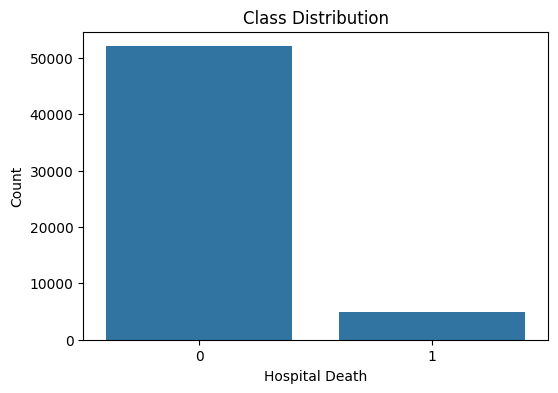

In [85]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.show()

In [86]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: hospital_death
0    34914
1     3232
Name: count, dtype: int64
Resampled dataset shape: hospital_death
0    34914
1    34914
Name: count, dtype: int64


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model= GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
####
gb_pred= gb_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred))
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))
print("Accuracy Score:", accuracy_score(y_test, gb_pred))

Confusion Matrix:
[[16528   602]
 [ 1140   519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17130
           1       0.46      0.31      0.37      1659

    accuracy                           0.91     18789
   macro avg       0.70      0.64      0.66     18789
weighted avg       0.89      0.91      0.90     18789

Accuracy Score: 0.9072861780829209


In [90]:
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature importances:")
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.4f}")


Feature importances:
gcs_motor_apache: 0.3203
gcs_verbal_apache: 0.0845
d1_temp_min: 0.0549
gender_M: 0.0528
apache_2_diagnosis: 0.0479
gcs_eyes_apache: 0.0412
icu_admit_source_Operating Room / Recovery: 0.0365
d1_spo2_min: 0.0325
icu_admit_source_Accident & Emergency: 0.0221
gender_F: 0.0219
apache_3j_diagnosis: 0.0217
apache_3j_bodysystem_Cardiovascular: 0.0216
apache_2_bodysystem_Metabolic: 0.0187
icu_type_Med-Surg ICU: 0.0148
d1_sysbp_min: 0.0145
apache_3j_bodysystem_Metabolic: 0.0142
icu_admit_source_Floor: 0.0123
apache_3j_bodysystem_Neurological: 0.0119
apache_2_bodysystem_Respiratory: 0.0117
resprate_apache: 0.0100
apache_2_bodysystem_Neurologic: 0.0098
h1_spo2_min: 0.0096
apache_post_operative: 0.0083
h1_spo2_max: 0.0081
diabetes_mellitus: 0.0076
age: 0.0076
icu_type_MICU: 0.0072
icu_type_Neuro ICU: 0.0062
icu_id: 0.0058
d1_heartrate_max: 0.0056
d1_diasbp_min: 0.0048
apache_3j_bodysystem_Sepsis: 0.0040
d1_glucose_max: 0.0040
d1_resprate_max: 0.0037
ethnicity_Caucasian: 0.0036

In [92]:
from sklearn.ensemble import RandomForestClassifier
r_model= RandomForestClassifier(n_estimators=100, random_state=42)
r_model.fit(X_train_resampled, y_train_resampled)
r_pred = r_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, r_pred))
print("\nClassification Report:")
print(classification_report(y_test, r_pred))
print("Accuracy Score:", accuracy_score(y_test, r_pred))


Confusion Matrix:
[[16748   382]
 [ 1254   405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     17130
           1       0.51      0.24      0.33      1659

    accuracy                           0.91     18789
   macro avg       0.72      0.61      0.64     18789
weighted avg       0.89      0.91      0.90     18789

Accuracy Score: 0.9129277768907339


Conclusion

This project successfully developed machine learning models to predict mortality in Intensive Care Unit (ICU) patients using various clinical parameters. Both Logistic Regression and Random Forest classifiers demonstrated strong predictive performance, achieving accuracy scores of approximately 91.5% and 92.1%, respectively. However, the models exhibited challenges in correctly identifying patients at high risk of mortality (class 1), as indicated by lower precision and recall values for this class.

Following the application of SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance, the models maintained competitive accuracy, but the challenge of low recall for the minority class persisted, suggesting that while more balanced data can enhance overall model performance, targeted efforts are still needed to improve predictions for high-risk patients.

Feature importance analysis revealed that the Glasgow Coma Scale (GCS) scores, particularly the motor component, were significant predictors of mortality, followed by other clinical parameters such as temperature and gender. These insights highlight the importance of specific clinical indicators in predicting ICU outcomes, providing valuable information for clinicians in patient management.